<a href="https://colab.research.google.com/github/OsamaM0/Machine_Learning_Projects/blob/Optimization-Projects-(Soft-Computing)/ANN_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare the dataset

## import libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import time
import tensorflow as ts
from tensorflow import keras as tk

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## import the dataset

In [ ]:
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")
data.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

## Choose Numerical Features

In [ ]:
df=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


## Encoding The Non Numerically Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,NaN,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


In [ ]:
df = df.dropna(axis=0, subset=['bmi'])
df.reset_index(drop=True, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=["age","avg_glucose_level","bmi"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

## split the data

In [ ]:
y=df['stroke']
x=df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, Y_tr, Y_te = train_test_split(x, y, test_size=0.25, random_state=42)

  

#Build the ANN

## Build layeres of ANN

In [ ]:
model = tk.Sequential([
  tk.layers.Flatten(),
  tk.layers.Dense(25,activation = "relu"),  
  tk.layers.Dense(25,activation = "relu"),
  tk.layers.Dense(1,activation = "sigmoid")  
])

## Compile the layeres of ANN

In [ ]:
model.compile("adam","binary_crossentropy", metrics=['accuracy'] )

## Train the model

In [ ]:
t0 = time.time()
history = model.fit(X_tr, Y_tr, epochs=50, batch_size=8, validation_split=0.1)
t1 = time.time()

print("Time taken to train the model: ", t1-t0, "secs")

Epoch 1/50
414/414 [==============================] - 2s 3ms/step - loss: 0.2024 - accuracy: 0.9541 - val_loss: 0.2177 - val_accuracy: 0.9485
Epoch 2/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1573 - accuracy: 0.9617 - val_loss: 0.2027 - val_accuracy: 0.9485
Epoch 3/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9617 - val_loss: 0.2106 - val_accuracy: 0.9485
Epoch 4/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9617 - val_loss: 0.2010 - val_accuracy: 0.9485
Epoch 5/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1388 - accuracy: 0.9617 - val_loss: 0.2034 - val_accuracy: 0.9485
Epoch 6/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9617 - val_loss: 0.1934 - val_accuracy: 0.9485
Epoch 7/50
414/414 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9617 - val_loss: 0.1937 - val_accuracy: 0.9485
Epoch 

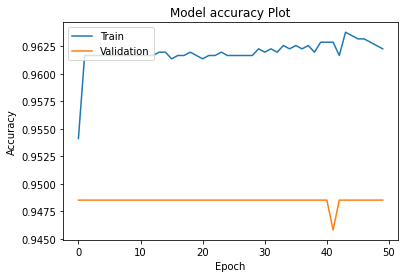

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

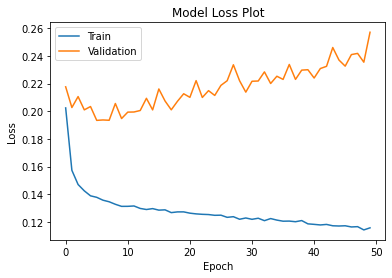

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Calculate the Accuracy 

In [ ]:
loss_value , acc_value = model.evaluate( X_te, Y_te  )

39/39 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9479


In [ ]:
print("Model has accuracy= ",acc_value * 100, "%")

Model has accuracy=  94.78827118873596 %


In [ ]:
y_pred = model.predict(X_te)

39/39 [==============================] - 0s 1ms/step


## Summary of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                275       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________
